# 动态气泡图


### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
colors = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
          '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
          '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 读取从 https://www.gapminder.org/data 下载的 Excel文件
dfx = pd.read_excel('./data/income_per_person.xlsx', index_col='country')
dfy = pd.read_excel('./data/life_expectancy_years.xlsx', index_col='country')
dfs = pd.read_excel('./data/population_total.xlsx', index_col='country')

### 3. 开始画图

用「**面向对象**」的方法画图。

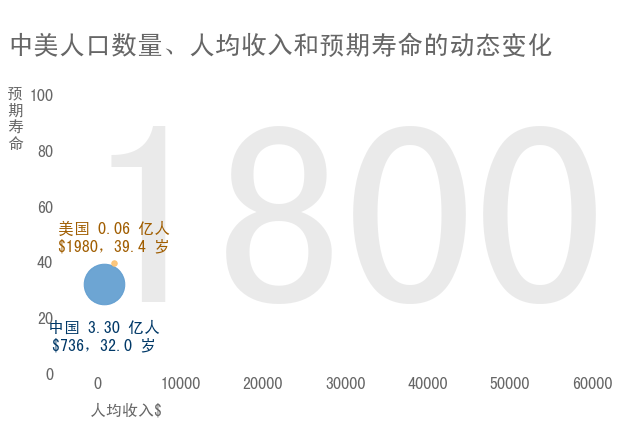

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(9, 6))

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# 隐藏刻度线
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=colors['深灰色'])

# 动画函数
def animate(year):
    # 先清空画布，让画面动态显示新的数据
    ax.cla()
    
    # 设置标题
    ax.text(-11000, 106, '\n中美人口数量、人均收入和预期寿命的动态变化\n', fontsize=26, color=colors['深灰色'])
    
    # 主要通过数字 year 来控制图形的变化，year = 0 代表第 1 年，当 year 增加，相应的画图数据发生变化

    # 中国数据
    x = dfx.loc['China'].iloc[year, ]
    y = dfy.loc['China'].iloc[year, ]
    s = dfs.loc['China'].iloc[year, ]/100000000
    # 画气泡图
    ax.scatter(x, y, s*500, c = colors['浅蓝色'], alpha=0.9)
    # 设置显示的文本标签
    ax.text(x, y-18.5, '中国 ' + '%.2f' % s + ' 亿人\n$' + '%.0f' % x + '，' + '%.1f' % y + ' 岁', 
            fontsize=16, c = colors['深蓝色'], ha='center', va='center')

    # 美国数据
    x = dfx.loc['United States'].iloc[year, ]
    y = dfy.loc['United States'].iloc[year, ]
    s = dfs.loc['United States'].iloc[year, ]/100000000
    # 画气泡图
    ax.scatter(x, y, s*500, c = colors['浅橙色'], alpha=0.9)
    # 设置显示的文本标签
    ax.text(x, y+15.5, '美国 ' + '%.2f' % s + ' 亿人\n$' + '%.0f' % x + '，' + '%.1f' % y + ' 岁', 
            fontsize=16, c = colors['深橙色'], ha='center', va='top')
    
    # 设置坐标轴范围
    ax.set_xlim(-5000, 65000)
    ax.set_ylim(0, 100)
    
    # 设置 X、Y 轴的标题，适当留白
    ax.text(-1000, -15, '人均收入$', ha='left', fontsize=16, color=colors['深灰色'])
    ax.text(-11000, 103, '预\n期\n寿\n命', va='top', fontsize=16, color=colors['深灰色'])
    
    # 更新文本的位置和内容
    x_mean = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
    y_mean = (ax.get_ylim()[0] + ax.get_ylim()[1]) / 2
    ax.text(x_mean, y_mean, str(1800 + year), ha='center', va='center', fontsize=260, color=colors['灰色'], zorder=-1, alpha=0.2)

# 用函数的方式绘制动画，frames 表示动画的张数， interval 表示间隔毫秒数
anim = FuncAnimation(fig, animate, frames=220, interval=100)


# 保存为 mp4 的文件格式
anim.save('动态气泡图.mp4')